In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import func as f

%matplotlib inline

# Here we will try to answer our second question: which are the most popular technologies like Language, Database, Framework

# Most Popular Language

In [2]:
# Load the data into pandas dataframe 
df_2018 = pd.read_csv('data/2018/survey_results_public.csv',low_memory=False);
schema_2018 =pd.read_csv('data/2018/survey_results_schema.csv');
df_2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [3]:
schema_2018.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?
3,Country,In which country do you currently reside?
4,Student,"Are you currently enrolled in a formal, degree..."


### Most Popular Language

In [4]:
# get the description of the of LanguageWorkedWith column
f.get_description('LanguageWorkedWith')

'Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [5]:
#different values and their counts in LanguageWorkedWith column
df_2018.LanguageWorkedWith.value_counts().reset_index().head()

,index,LanguageWorkedWith
0,C#;JavaScript;SQL;HTML;CSS,1347
1,JavaScript;PHP;SQL;HTML;CSS,1235
2,Java,1030
3,JavaScript;HTML;CSS,881
4,C#;JavaScript;SQL;TypeScript;HTML;CSS,828


Above plot needs cleaning as each row has multiple values. These needs to be segregated into individuals and then counted

In [6]:
# Unique Values in LanguageWorkedWith Column
pos_lang_vals = f.unique_vals(df_2018,'LanguageWorkedWith')
print(pos_lang_vals)

['JavaScript', 'Python', 'HTML', 'CSS', 'Bash/Shell', 'C#', 'SQL', 'TypeScript', 'C', 'C++', 'Java', 'Matlab', 'R', 'Assembly', 'CoffeeScript', 'Erlang', 'Go', 'Lua', 'Ruby', 'PHP', 'VB.NET', 'Swift', 'Groovy', 'Kotlin', 'Objective-C', 'Scala', 'F#', 'Haskell', 'Rust', 'Julia', 'VBA', 'Perl', 'Cobol', 'Visual Basic 6', 'Delphi/Object Pascal', 'Hack', 'Clojure', 'Ocaml']


,index,LanguageWorkedWith
0,C#;JavaScript;SQL;HTML;CSS,1347
1,JavaScript;PHP;SQL;HTML;CSS,1235
2,Java,1030
3,JavaScript;HTML;CSS,881
4,C#;JavaScript;SQL;TypeScript;HTML;CSS,828
5,JavaScript;PHP;SQL;HTML;CSS;Bash/Shell,768
6,JavaScript;PHP;HTML;CSS,725
7,Java;JavaScript;SQL;HTML;CSS,530
8,C#,491
9,Python,399


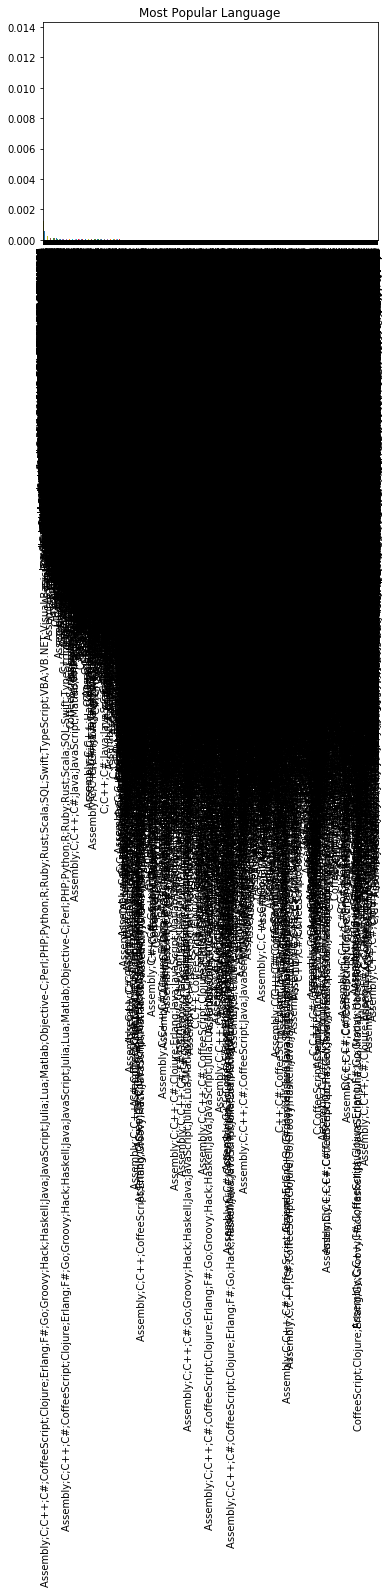

In [7]:
# Lets try to plot the status values on the column
f.status_values_plot(df_2018,'LanguageWorkedWith','Most Popular Language',True)

Above table and plot doesnt give a clear picture and needs clean up.

### We have written a clean_and_plot function in func.py for cleaning the values of a Column and plotting it.

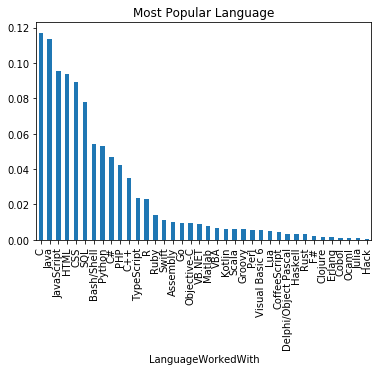

In [8]:
# Clean and plot values of LanguageWorkedWith column  using clean_and_plot function written in func.py
most_popular_lang = f.clean_and_plot(df_2018,'LanguageWorkedWith',pos_lang_vals,'Most Popular Language',True)

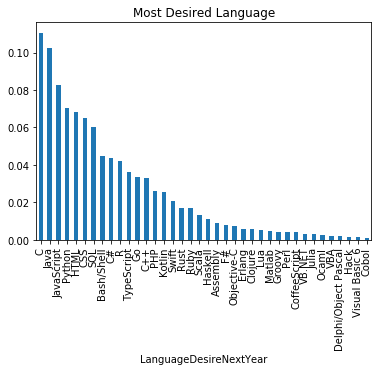

In [9]:
# Clean and plot values of LanguageDesireNextYear column  using clean_and_plot function written in func.py
most_desired_lang = f.clean_and_plot(df_2018,'LanguageDesireNextYear',pos_lang_vals,'Most Desired Language',True)

As can be seen from above 2 plots that C language along with Java is not only the most popular language but it is also 
the most desired language next year

In [10]:
#clean_and_plot(df_2017,'HaveWorkedLanguage',possible_vals,'Most Popular Lang',True)
#clean_and_plot(df_2017,'WantWorkLanguage',pos_vals,'Most Desired Lang',True)

In [11]:
#clean_and_plot(df_2016,'tech_do',possible_vals,'Most Popular Lang',True)
#clean_and_plot(df_2016,'tech_want',pos_vals,'Most Desired Lang',True)

# Most Popular Database

In [12]:
# get the description of the of LanguageWorkedWith column
f.get_description('DatabaseWorkedWith')

'Which of the following database environments have you done extensive development work in over the past year, and which do you want to work in over the next year?   (If you both worked with the database and want to continue to do so, please check both boxes in that row.)'

In [13]:
# different values and their counts in LanguageWorkedWith column
df_2018.DatabaseWorkedWith.value_counts()

MySQL                                                                                                                                          5968
SQL Server                                                                                                                                     5090
SQL Server;MySQL                                                                                                                               3017
PostgreSQL                                                                                                                                     2091
MySQL;PostgreSQL                                                                                                                               1400
SQLite                                                                                                                                         1333
MongoDB                                                                                                         

In [14]:
# Unique Values in DatabaseWorkedWith Column
pos_db_vals = f.unique_vals(df_2018,'DatabaseWorkedWith')
print(pos_db_vals)

['Redis', 'SQL Server', 'MySQL', 'PostgreSQL', 'Amazon RDS/Aurora', 'Microsoft Azure (Tables, CosmosDB, SQL, etc)', 'Memcached', 'Oracle', 'IBM Db2', 'MongoDB', 'Google Cloud Storage', 'Amazon DynamoDB', 'Apache HBase', 'Apache Hive', 'Amazon Redshift', 'Elasticsearch', 'MariaDB', 'SQLite', 'Google BigQuery', 'Cassandra', 'Neo4j']


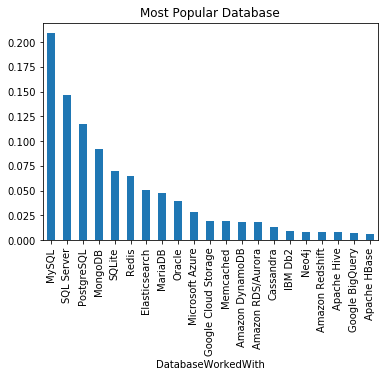

In [15]:
# Clean and plot values of DatabaseWorkedWith column  using clean_and_plot function written in func.py
most_popular_database = f.clean_and_plot(df_2018,'DatabaseWorkedWith',pos_db_vals,'Most Popular Database',True)

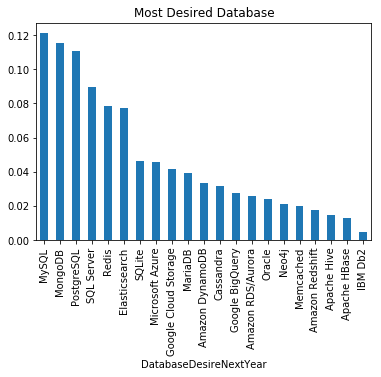

In [16]:
most_desired_database = f.clean_and_plot(df_2018,'DatabaseDesireNextYear',pos_db_vals,'Most Desired Database',True)

It can be seen from above plot that MySQL and SQL Server are the most popular Database.

In [17]:
#clean_and_plot(df_2017,'HaveWorkedDatabase',pos_db_vals,'Most Popular Lang',True)

# Most Popular Framework

In [18]:
# get the description of the of FrameworkWorkedWith column
f.get_description('FrameworkWorkedWith')

'Which of the following libraries, frameworks, and tools have you done extensive development work in over the past year, and which do you want to work in over the next year?'

In [19]:
# different values and their counts in FrameworkWorkedWith column
df_2018.FrameworkWorkedWith.value_counts()

.NET Core                                                             4517
Node.js                                                               4453
Node.js;React                                                         3436
Spring                                                                2830
Angular;Node.js                                                       2594
Angular                                                               2561
Django                                                                1931
React                                                                 1712
Angular;Node.js;React                                                 1613
Angular;.NET Core                                                     1297
Angular;.NET Core;Node.js                                             1146
TensorFlow                                                             978
.NET Core;Node.js                                                      961
Angular;Spring           

In [20]:
# Unique Values in FrameworkWorkedWith Column
pos_db_vals = f.unique_vals(df_2018,'FrameworkWorkedWith')
print(pos_db_vals)

['Django', 'React', 'Angular', 'Node.js', 'Hadoop', 'Spark', 'Spring', '.NET Core', 'Cordova', 'Xamarin', 'TensorFlow', 'Torch/PyTorch']


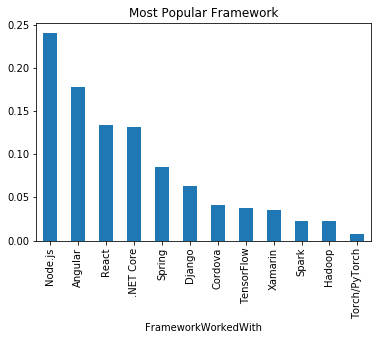

In [21]:
# Clean and plot values of FrameworkWorkedWith column  using clean_and_plot function written in func.py
most_popular_framework = f.clean_and_plot(df_2018,'FrameworkWorkedWith',pos_db_vals,'Most Popular Framework',True)

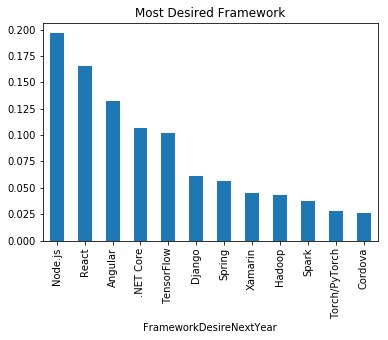

In [22]:
most_desired_framework = f.clean_and_plot(df_2018,'FrameworkDesireNextYear',pos_db_vals,'Most Desired Framework',True)

It can be seen from above plot that Node.js and Angular are the 2 most popular Framework.

# Conclusion:
    The Most popular Technologies are:
    Language: C and Java
    Database: MySQL and SQL Server
    Framework: Node.js and Angular